In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np

Data = pd.ExcelFile("C:/Users/rohil/Downloads/DataH3MSF6321.xlsx")
df = Data.parse('Industry Portfolios', skiprows=2, index_col=None, na_values=['NA'])

Ret = df.iloc[:,1:7] # These are the excess returns of the 6 assets
N = len(Ret.columns)

E0 = Ret.mean(axis = 0, skipna = True).T # Here E0 is just the in sample mean of the EXCESS returns
SIGMA = np.cov(Ret.T)

RF = 0.4 

E0 = E0 + RF

'Get the predictors'
DP = df.iloc[:,7]
TERM = df.iloc[:,8]
DEF = df.iloc[:,9]
INF = df.iloc[:,10]
UNE = df.iloc[:,11]

'Just for fun, here are some basic characteristics of the assets'
SDs = (SIGMA.diagonal()**0.5).T
SRs=(E0.T-RF)/SDs
     
Table_Characteristics = np.array([E0.T , SDs , SRs])
print(' ')
print(' Mean, Sdev and Sharpe ratio of the 6 assets')
row = ( 'Mean', 'Sdev', 'Sharpe ratio' )
head = ('Asset 1','Asset 2','Asset 3','Asset 4','Asset 5','Asset 6') 
fmt = '%6.2f'
Table_Characteristics = pd.DataFrame(Table_Characteristics, index = row, columns = head )
print(Table_Characteristics.to_latex(float_format = fmt))

 
 Mean, Sdev and Sharpe ratio of the 6 assets
\begin{tabular}{lrrrrrr}
\toprule
 & Asset 1 & Asset 2 & Asset 3 & Asset 4 & Asset 5 & Asset 6 \\
\midrule
Mean &   1.38 &   0.98 &   1.43 &   0.95 &   1.85 &   1.01 \\
Sdev &   5.86 &   5.56 &   5.60 &   5.50 &   7.84 &   8.52 \\
Sharpe ratio &   0.17 &   0.11 &   0.18 &   0.10 &   0.18 &   0.07 \\
\bottomrule
\end{tabular}



In [3]:
MyData = pd.read_csv("DataH3MSF6321.csv", skiprows=2)
display(MyData)

,Date,VALUE,GROWTH,VALUE.1,GROWTH.1,VALUE.2,GROWTH.2,dp,term,default,inflation,unemploy
0,196507,3.964,1.875,3.144,1.712,6.330,2.313,0.030069,0.22,0.40,0.00,4.4
1,196508,4.979,4.192,3.120,2.865,10.162,8.092,0.029863,0.18,0.39,0.00,4.4
2,196509,0.348,2.789,6.141,4.169,3.249,5.657,0.029008,0.09,0.39,0.00,4.3
3,196510,4.340,3.957,5.880,3.467,8.602,4.132,0.028214,0.05,0.37,0.32,4.2
4,196511,1.093,0.993,2.892,0.655,8.406,12.847,0.029084,0.08,0.35,0.00,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...
487,200602,0.174,2.460,-3.187,-2.554,0.983,-0.308,0.017324,-0.11,0.92,0.20,4.8
488,200603,2.891,4.409,6.129,5.299,6.401,2.925,0.017004,-0.05,0.88,0.55,4.7
489,200604,1.956,1.374,3.888,3.285,0.528,-0.223,0.017064,0.09,0.84,0.85,4.7
490,200605,-4.688,-4.811,-4.950,-5.699,-5.851,-8.216,0.018114,0.11,0.80,0.50,4.6


In [4]:
Ret = MyData.iloc[:,1:7] # These are the excess returns of the 6 assets
N = len(Ret.columns)
display(Ret)
display(N)

,VALUE,GROWTH,VALUE.1,GROWTH.1,VALUE.2,GROWTH.2
0,3.964,1.875,3.144,1.712,6.330,2.313
1,4.979,4.192,3.120,2.865,10.162,8.092
2,0.348,2.789,6.141,4.169,3.249,5.657
3,4.340,3.957,5.880,3.467,8.602,4.132
4,1.093,0.993,2.892,0.655,8.406,12.847
...,...,...,...,...,...,...
487,0.174,2.460,-3.187,-2.554,0.983,-0.308
488,2.891,4.409,6.129,5.299,6.401,2.925
489,1.956,1.374,3.888,3.285,0.528,-0.223
490,-4.688,-4.811,-4.950,-5.699,-5.851,-8.216


6

In [5]:
E0 = Ret.mean(axis = 0, skipna = True).T # Here E0 is just the in sample mean of the EXCESS returns
SIGMA = np.cov(Ret.T) # Covariance of each assest with every asset
display(E0)
display(SIGMA)

RF = 0.4 

# Actuall Return -- Excess Return Mean + R_f
E0 = E0 + RF
display(E0)

VALUE       0.979065
GROWTH      0.584815
VALUE.1     1.030388
GROWTH.1    0.545289
VALUE.2     1.445569
GROWTH.2    0.612967
dtype: float64

array([[34.32242143, 29.43292547, 29.5176847 , 26.27367872, 39.79705936,
        39.93713853],
       [29.43292547, 30.91676397, 27.34445567, 27.08265204, 36.62664135,
        40.08769234],
       [29.5176847 , 27.34445567, 31.38189096, 28.66060242, 36.53946732,
        37.29183941],
       [26.27367872, 27.08265204, 28.66060242, 30.27115944, 33.57510689,
        37.14602496],
       [39.79705936, 36.62664135, 36.53946732, 33.57510689, 61.52138957,
        61.86010063],
       [39.93713853, 40.08769234, 37.29183941, 37.14602496, 61.86010063,
        72.64499157]])

VALUE       1.379065
GROWTH      0.984815
VALUE.1     1.430388
GROWTH.1    0.945289
VALUE.2     1.845569
GROWTH.2    1.012967
dtype: float64

In [6]:
'Get the predictors'
DP = MyData.iloc[:,7] # Divident/Price Ratio
TERM = MyData.iloc[:,8] # Term Spread
DEF = MyData.iloc[:,9] # Default Spread
INF = MyData.iloc[:,10] # Inflation
UNE = MyData.iloc[:,11] # Unemployment Rate

display(DP)
display(TERM)
display(DEF)
display(INF)
display(UNE)

0      0.030069
1      0.029863
2      0.029008
3      0.028214
4      0.029084
         ...   
487    0.017324
488    0.017004
489    0.017064
490    0.018114
491    0.018174
Name: dp, Length: 492, dtype: float64

0      0.22
1      0.18
2      0.09
3      0.05
4      0.08
       ... 
487   -0.11
488   -0.05
489    0.09
490    0.11
491   -0.05
Name: term, Length: 492, dtype: float64

0      0.40
1      0.39
2      0.39
3      0.37
4      0.35
       ... 
487    0.92
488    0.88
489    0.84
490    0.80
491    0.89
Name: default, Length: 492, dtype: float64

0      0.00
1      0.00
2      0.00
3      0.32
4      0.00
       ... 
487    0.20
488    0.55
489    0.85
490    0.50
491    0.20
Name: inflation, Length: 492, dtype: float64

0      4.4
1      4.4
2      4.3
3      4.2
4      4.1
      ... 
487    4.8
488    4.7
489    4.7
490    4.6
491    4.6
Name: unemploy, Length: 492, dtype: float64

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# ----------------------------
# 0. Setup
# ----------------------------

RF = 0.4  # monthly risk-free rate given in the question

asset_cols = ['VALUE', 'GROWTH', 'VALUE.1', 'GROWTH.1', 'VALUE.2', 'GROWTH.2']

# Make sure Ret only has the 6 assets (and is excess return already)
Ret = Ret[asset_cols]      # <-- if your Ret already has these columns, this is fine

# Dividend-price ratio series (predictor)
dp = DP          # <-- change 'dp' to your D/P column name if needed

# Align Ret and dp on the same dates, just in case
Ret, dp = Ret.align(dp, join='inner', axis=0)

# Last available D/P (June 2006) used for the forecast
dp_last = dp.iloc[-1]

# ----------------------------
# 1. Build regression sample
# R^e_{i,t+1} = a_i + b_i * (D_t / P_t) + eps_{i,t+1}
# ----------------------------

# X_t = D_t / P_t from first to second-last observation
X = dp.iloc[:-1]

# Y_{t+1} = excess returns from second to last observation
Y = Ret.iloc[1:]

# Add intercept
X_design = sm.add_constant(X.values)   # shape (T-1, 2)

# ----------------------------
# 2. Run 6 separate OLS regressions
# ----------------------------

alphas, betas = [], []
t_alphas, t_betas = [], []
R2_list = []

for col in asset_cols:
    y = Y[col].values

    model = sm.OLS(y, X_design)
    res = model.fit()

    a_hat = res.params[0]
    b_hat = res.params[1]
    t_a   = res.tvalues[0]
    t_b   = res.tvalues[1]
    R2    = res.rsquared

    alphas.append(a_hat)
    betas.append(b_hat)
    t_alphas.append(t_a)
    t_betas.append(t_b)
    R2_list.append(R2)

# Put everything into a table
regression_summary = pd.DataFrame(
    {
        'alpha_hat': alphas,
        'beta_hat':  betas,
        't_alpha':   t_alphas,
        't_beta':    t_betas,
        'R2':        R2_list,
    },
    index=asset_cols
)
regression_summary['R2 in %'] = 100 * regression_summary['R2']
regression_summary.drop('R2', axis=1, inplace=True)
display(regression_summary)


for col in asset_cols:
    y = Y[col].values
    model = sm.OLS(y, X_design)
    res   = model.fit()
    print(f"\n=== OLS summary for {col} ===")
    print(res.summary())

,alpha_hat,beta_hat,t_alpha,t_beta,R2 in %
VALUE,-0.139726,36.674391,-0.181094,1.534963,0.479512
GROWTH,-0.882547,48.276893,-1.207632,2.133255,0.922049
VALUE.1,0.592351,14.295608,0.801187,0.624402,0.079666
GROWTH.1,0.004455,17.747291,0.006135,0.789367,0.127261
VALUE.2,0.800265,20.941012,0.773286,0.653448,0.087244
GROWTH.2,-0.652078,41.581137,-0.580237,1.194839,0.291101



=== OLS summary for VALUE ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.356
Date:                Sun, 23 Nov 2025   Prob (F-statistic):              0.125
Time:                        11:39:59   Log-Likelihood:                -1563.4
No. Observations:                 491   AIC:                             3131.
Df Residuals:                     489   BIC:                             3139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1397

In [8]:
# Expected excess return for each asset:
#   E_hat[Re_{i,t+1}] = a_hat_i + b_hat_i * (D/P)_200606

E_excess = regression_summary['alpha_hat'] + regression_summary['beta_hat'] * dp_last
E_excess.name = 'E_hat_excess'

display(E_excess)

VALUE       0.526781
GROWTH     -0.005181
VALUE.1     0.852154
GROWTH.1    0.326987
VALUE.2     1.180839
GROWTH.2    0.103602
Name: E_hat_excess, dtype: float64

In [9]:
# Convert excess to total expected returns:
#   E_hat[R_{i,t+1}] = R_f + E_hat[Re_{i,t+1}]

E = RF + E_excess
E.name = 'E_hat_total'

display(E)

VALUE       0.926781
GROWTH      0.394819
VALUE.1     1.252154
GROWTH.1    0.726987
VALUE.2     1.580839
GROWTH.2    0.503602
Name: E_hat_total, dtype: float64

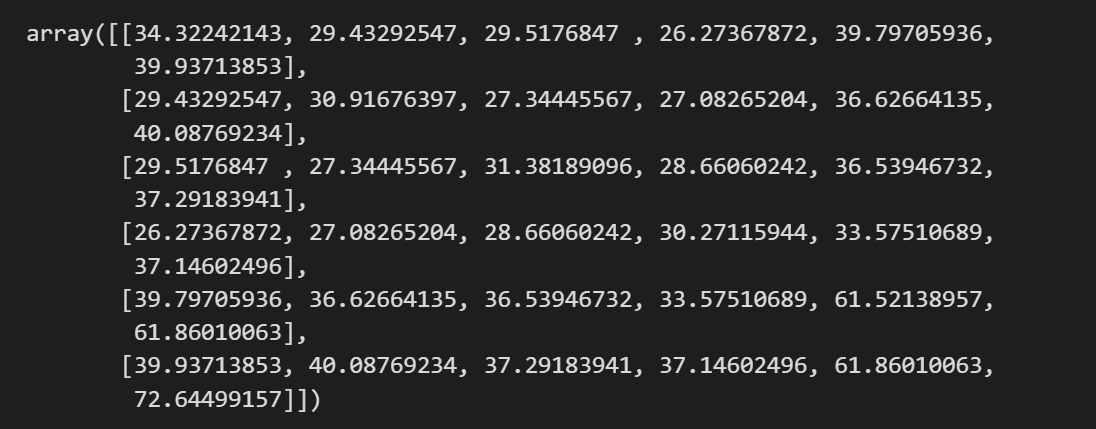

In [10]:
SIGMA = np.cov(Ret.T)   # sample covariance of excess returns
SIGMA

array([[34.32242143, 29.43292547, 29.5176847 , 26.27367872, 39.79705936,
        39.93713853],
       [29.43292547, 30.91676397, 27.34445567, 27.08265204, 36.62664135,
        40.08769234],
       [29.5176847 , 27.34445567, 31.38189096, 28.66060242, 36.53946732,
        37.29183941],
       [26.27367872, 27.08265204, 28.66060242, 30.27115944, 33.57510689,
        37.14602496],
       [39.79705936, 36.62664135, 36.53946732, 33.57510689, 61.52138957,
        61.86010063],
       [39.93713853, 40.08769234, 37.29183941, 37.14602496, 61.86010063,
        72.64499157]])

In [11]:
import numpy as np
import pandas as pd

# 1) Expected TOTAL returns from part (a)
E = RF + E_excess              # Series length 6
E.name = 'E_hat_total'

# 2) Covariance matrix of EXCESS returns (as before)
SIGMA = np.cov(Ret.T)          # 6×6 numpy array

display(E)
print(SIGMA)

VALUE       0.926781
GROWTH      0.394819
VALUE.1     1.252154
GROWTH.1    0.726987
VALUE.2     1.580839
GROWTH.2    0.503602
Name: E_hat_total, dtype: float64

[[34.32242143 29.43292547 29.5176847  26.27367872 39.79705936 39.93713853]
 [29.43292547 30.91676397 27.34445567 27.08265204 36.62664135 40.08769234]
 [29.5176847  27.34445567 31.38189096 28.66060242 36.53946732 37.29183941]
 [26.27367872 27.08265204 28.66060242 30.27115944 33.57510689 37.14602496]
 [39.79705936 36.62664135 36.53946732 33.57510689 61.52138957 61.86010063]
 [39.93713853 40.08769234 37.29183941 37.14602496 61.86010063 72.64499157]]


In [12]:
n_assets = len(asset_cols)

# Convert to column vector mu (6×1)
mu = E.values.reshape(-1, 1)

# 1-vector
ones = np.ones((n_assets, 1))

# Inverse covariance
Sigma_inv = np.linalg.inv(SIGMA)

# Unnormalized tangency weights: w_tilde = Σ^{-1}(E - Rf * 1)
w_tilde = Sigma_inv.dot(mu - RF * ones)

# Normalize to sum to 1: w* = w_tilde / (1' w_tilde)
normalizer = float(ones.T.dot(w_tilde))
w_star = w_tilde / normalizer      # 6×1

# Put in a nice Series
MVEP_weights = pd.Series(w_star.flatten(), index=asset_cols, name='MVEP_weight')
display(MVEP_weights)
print("Sum of weights:", MVEP_weights.sum())

C:\Users\rohil\AppData\Local\Temp\ipykernel_70016\1705422588.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  normalizer = float(ones.T.dot(w_tilde))


VALUE       -4.996361
GROWTH      -7.482677
VALUE.1     12.471282
GROWTH.1    -3.197261
VALUE.2     13.053033
GROWTH.2    -8.848015
Name: MVEP_weight, dtype: float64

Sum of weights: 0.9999999999999982


In [13]:
w = MVEP_weights.values           # 1×6

# Expected portfolio TOTAL return (in same % units)
mu_p = float(w @ E.values)

# Portfolio standard deviation (same units as individual returns)
sigma_p = float(np.sqrt(w @ SIGMA @ w))

# Sharpe ratio (using % units)
sharpe_p = (mu_p - RF) / sigma_p

print(f"MVEP expected return (mu_p): {mu_p:.4f}")
print(f"MVEP standard deviation (sigma_p): {sigma_p:.4f}")
print(f"MVEP Sharpe ratio: {sharpe_p:.4f}")

MVEP expected return (mu_p): 21.8856
MVEP standard deviation (sigma_p): 48.8482
MVEP Sharpe ratio: 0.4398


In [14]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # ----- Inputs (your numbers; % per month) -----
# asset_names = ["VALUE","GROWTH","VALUE.1","GROWTH.1","VALUE.2","GROWTH.2"]

# E = np.array([0.926781, 0.394819, 1.252154, 0.726987, 1.580839, 0.503602])  # total expected returns (%)
# SIGMA = np.array([
#     [34.32242143, 29.43292547, 29.5176847 , 26.27367872, 39.79705936, 39.93713853],
#     [29.43292547, 30.91676397, 27.34445567, 27.08265204, 36.62664135, 40.08769234],
#     [29.5176847 , 27.34445567, 31.38189096, 28.66060242, 36.53946732, 37.29183941],
#     [26.27367872, 27.08265204, 28.66060242, 30.27115944, 33.57510689, 37.14602496],
#     [39.79705936, 36.62664135, 36.53946732, 33.57510689, 61.52138957, 61.86010063],
#     [39.93713853, 40.08769234, 37.29183941, 37.14602496, 61.86010063, 72.64499157]
# ])
# Rf = 0.4  # %/mo

# # ----- MVEP (tangency) weights: w* ∝ Σ^{-1}(E - Rf·1) -----
# mu = E.reshape(-1,1)
# ones = np.ones((len(asset_names),1))
# Sigma_inv = np.linalg.inv(SIGMA)
# w_tilde = Sigma_inv @ (mu - Rf*ones)
# w = (w_tilde / float(ones.T @ w_tilde)).flatten()  # sum to 1

# # MVEP stats
# mu_p = float(w @ E)
# sigma_p = float(np.sqrt(w @ SIGMA @ w))
# sharpe_p = (mu_p - Rf) / sigma_p

# print(pd.Series(w, index=asset_names, name="MVEP (shorting allowed) weights"))
# print(f"\nMVEP expected return (μ): {mu_p:.4f}%")
# print(f"MVEP standard deviation (σ): {sigma_p:.4f}%")
# print(f"MVEP Sharpe: {(mu_p - Rf)/sigma_p:.4f}")

# # ----- Unconstrained efficient frontier -----
# A = float(ones.T @ Sigma_inv @ ones)
# B = float(ones.T @ Sigma_inv @ mu)
# C = float(mu.T @ Sigma_inv @ mu)
# D = A*C - B**2

# mu_grid = np.linspace(B/C - 3.0, B/C + 4.0, 400)
# sd_grid = np.sqrt((A*(mu_grid**2) - 2*B*mu_grid + C) / D)

# # GMV
# mu_gmv = B/C
# sd_gmv = np.sqrt(1/C)

# # ----- Plot -----
# plt.figure(figsize=(8,6))
# plt.plot(sd_grid, mu_grid, label="Unconstrained MV frontier")

# asset_sds = np.sqrt(np.diag(SIGMA))
# plt.scatter(asset_sds, E, marker="x", s=100, label="Assets")
# for name, x, y in zip(asset_names, asset_sds, E):
#     plt.annotate(name, (x, y), textcoords="offset points", xytext=(5,-10), fontsize=9)

# plt.scatter([sigma_p], [mu_p], marker="*", s=200, label="MVEP")
# plt.annotate(f"MVEP (σ={sigma_p:.2f}%, μ={mu_p:.2f}%)", (sigma_p, mu_p), textcoords="offset points", xytext=(10,10), fontsize=9)

# plt.scatter([sd_gmv], [mu_gmv], marker="o", s=60, label="GMV")
# plt.annotate(f"GMV (σ={sd_gmv:.2f}%, μ={mu_gmv:.2f}%)", (sd_gmv, mu_gmv), textcoords="offset points", xytext=(10,-15), fontsize=9)

# # CAL through MVEP
# sig_line = np.linspace(0, max(sd_grid.max(), sigma_p)*1.05, 50)
# cal_line = Rf + ((mu_p - Rf)/sigma_p) * sig_line
# plt.plot(sig_line, cal_line, linestyle="--", label="CAL (through MVEP)")

# plt.xlabel("Portfolio σ (%)")
# plt.ylabel("Expected return μ (%)")
# plt.title("MVEP (shorting allowed), Efficient Frontier, and CAL")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


In [15]:
# # === Unconstrained MV frontier with GMV and MVEP (full + zoomed plots) ===
# # Units: all returns are % per month, covariances are (%^2).

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # ------------------------
# # Inputs (your data)
# # ------------------------
# asset_names = ["VALUE","GROWTH","VALUE.1","GROWTH.1","VALUE.2","GROWTH.2"]

# E = np.array([
#     0.926781,
#     0.394819,
#     1.252154,
#     0.726987,
#     1.580839,
#     0.503602
# ])  # total expected returns, % per month

# SIGMA = np.array([
#     [34.32242143, 29.43292547, 29.5176847 , 26.27367872, 39.79705936, 39.93713853],
#     [29.43292547, 30.91676397, 27.34445567, 27.08265204, 36.62664135, 40.08769234],
#     [29.5176847 , 27.34445567, 31.38189096, 28.66060242, 36.53946732, 37.29183941],
#     [26.27367872, 27.08265204, 28.66060242, 30.27115944, 33.57510689, 37.14602496],
#     [39.79705936, 36.62664135, 36.53946732, 33.57510689, 61.52138957, 61.86010063],
#     [39.93713853, 40.08769234, 37.29183941, 37.14602496, 61.86010063, 72.64499157]
# ])

# Rf = 0.4  # risk-free rate, % per month

# # ------------------------
# # Core mean–variance math
# # ------------------------
# mu   = E.reshape(-1, 1)
# ones = np.ones((len(asset_names), 1))
# Sinv = np.linalg.inv(SIGMA)

# A = float(ones.T @ Sinv @ ones)
# B = float(ones.T @ Sinv @ mu)
# C = float(mu.T  @ Sinv @ mu)
# D = A*C - B**2

# # Frontier: sigma^2(mu) = (A mu^2 − 2 B mu + C)/D
# mu_grid = np.linspace(B/A - 3.0, B/A + 4.0, 500)          # center the grid at GMV mu=B/A
# sd_grid = np.sqrt((A*(mu_grid**2) - 2*B*mu_grid + C)/D)

# # GMV portfolio (CORRECT formulas)
# mu_gmv = B / A
# sd_gmv = 1 / np.sqrt(A)
# w_gmv  = (Sinv @ ones) / A

# # Tangency/MVEP (unconstrained)
# w_tilde = Sinv @ (mu - Rf*ones)
# w_mvep  = (w_tilde / float(ones.T @ w_tilde)).flatten()   # sum to 1
# mu_mvep = float(w_mvep @ E)
# sd_mvep = float(np.sqrt(w_mvep @ SIGMA @ w_mvep))
# slope   = (mu_mvep - Rf) / sd_mvep
# gross_exposure = float(np.sum(np.abs(w_mvep)))

# asset_sds = np.sqrt(np.diag(SIGMA))

# # ------------------------
# # Print headline stats
# # ------------------------
# print("GMV weights (sum=1):")
# print(pd.Series(w_gmv.flatten(), index=asset_names))
# print(f"\nGMV  -> mu={mu_gmv:.4f}%, sigma={sd_gmv:.4f}%")

# print("\nMVEP (tangency) weights (sum≈1):")
# print(pd.Series(w_mvep, index=asset_names))
# print(f"\nMVEP -> mu={mu_mvep:.4f}%, sigma={sd_mvep:.4f}%, Sharpe={(mu_mvep-Rf)/sd_mvep:.4f}, gross |w|={gross_exposure:.2f}x")

# # ------------------------
# # Plots: full view and zoomed-in view
# # ------------------------
# fig, (ax_full, ax_zoom) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# for ax in (ax_full, ax_zoom):
#     # Frontier
#     ax.plot(sd_grid, mu_grid, label="Unconstrained MV frontier")
#     # Assets
#     ax.scatter(asset_sds, E, marker="x", s=90, label="Assets")
#     for nm, x, y in zip(asset_names, asset_sds, E):
#         ax.annotate(nm, xy=(x, y), xytext=(5, -10), textcoords="offset points", fontsize=9)

#     # GMV (on the curve)
#     ax.scatter([sd_gmv], [mu_gmv], marker="o", s=70, label="GMV")
#     ax.annotate(
#     f"GMV\n(σ={sd_gmv:.2f}%, μ={mu_gmv:.2f}%)",
#     xy=(sd_gmv, mu_gmv),
#     xytext=(-5, 5),              # <-- move left/up (was (10, -15))
#     textcoords="offset points",
#     ha="right", va="bottom",       # <-- right-align so it sits cleanly left of the point
#     fontsize=9)


#     # MVEP (tangency)
#     ax.scatter([sd_mvep], [mu_mvep], marker="*", s=220, label="MVEP")
#     ax.annotate(f"MVEP\n(σ={sd_mvep:.2f}%, μ={mu_mvep:.2f}%)", xy=(sd_mvep, mu_mvep),
#                 xytext=(10, 10), textcoords="offset points", fontsize=9)

#     # CAL through MVEP, with explicit intercept at Rf
#     sig_line = np.linspace(0, max(sd_grid.max(), sd_mvep)*1.05, 250)
#     cal_line = Rf + slope * sig_line
#     ax.plot(sig_line, cal_line, linestyle="--", label="CAL (through MVEP)")
#     ax.scatter([0], [Rf], s=50)
#     ax.annotate(f"Rf = {Rf:.1f}%", xy=(0, Rf), xytext=(8, -12), textcoords="offset points", fontsize=9)

#     ax.set_xlabel("Portfolio σ (%)")
#     ax.grid(True)

# ax_full.set_title("Full view")
# ax_zoom.set_title("Zoomed view (σ ≤ 15%)")
# ax_zoom.set_xlim(0, 15)
# ax_zoom.set_ylim(min(min(E), Rf) - 1, max(max(E), mu_gmv) + 2)
# ax_full.set_xlim(0, max(sd_grid.max(), sd_mvep) * 1.05)

# fig.supylabel("Expected return μ (%)")
# handles, labels = ax_full.get_legend_handles_labels()
# fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(0.08, 1.05), ncol=3)
# fig.tight_layout()
# plt.show()


In [16]:
# # Corrected, full script: MV frontier, GMV, MVEP, and CAL (full view + zoomed view)
# # Units: returns in % per month; covariance in (%^2) per month.
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # ---------- Inputs ----------
# asset_names = ["VALUE","GROWTH","VALUE.1","GROWTH.1","VALUE.2","GROWTH.2"]

# E = np.array([
#     0.926781, 0.394819, 1.252154, 0.726987, 1.580839, 0.503602  # % per month
# ])

# SIGMA = np.array([
#     [34.32242143, 29.43292547, 29.5176847 , 26.27367872, 39.79705936, 39.93713853],
#     [29.43292547, 30.91676397, 27.34445567, 27.08265204, 36.62664135, 40.08769234],
#     [29.5176847 , 27.34445567, 31.38189096, 28.66060242, 36.53946732, 37.29183941],
#     [26.27367872, 27.08265204, 28.66060242, 30.27115944, 33.57510689, 37.14602496],
#     [39.79705936, 36.62664135, 36.53946732, 33.57510689, 61.52138957, 61.86010063],
#     [39.93713853, 40.08769234, 37.29183941, 37.14602496, 61.86010063, 72.64499157]
# ])

# Rf = 0.4  # % per month

# # ---------- Core MV algebra ----------
# mu   = E.reshape(-1, 1)
# ones = np.ones((len(asset_names), 1))
# Sinv = np.linalg.inv(SIGMA)

# A = float(ones.T @ Sinv @ ones)
# B = float(ones.T @ Sinv @ mu)
# C = float(mu.T  @ Sinv @ mu)
# D = A*C - B**2

# # Global Minimum-Variance portfolio (correct formulas)
# w_gmv  = (Sinv @ ones) / A
# mu_gmv = B / A
# sd_gmv = 1 / np.sqrt(A)

# # Tangency (MVEP) weights: w ∝ Σ^{-1}(E - Rf·1), normalized to sum to 1
# w_tilde = Sinv @ (mu - Rf*ones)
# w_mvep  = (w_tilde / float(ones.T @ w_tilde)).flatten()
# mu_mvep = float(w_mvep @ E)
# sd_mvep = float(np.sqrt(w_mvep @ SIGMA @ w_mvep))
# sharpe  = (mu_mvep - Rf) / sd_mvep
# gross_exposure = float(np.sum(np.abs(w_mvep)))

# # Frontier curve: sigma^2(mu) = (A mu^2 − 2 B mu + C)/D
# mu_center = mu_gmv
# mu_grid = np.linspace(mu_center - 3.0, mu_center + 4.0, 600)
# sd_grid = np.sqrt((A*(mu_grid**2) - 2*B*mu_grid + C) / D)

# # Individual asset points
# asset_sds = np.sqrt(np.diag(SIGMA))

# # ---------- Print stats ----------
# print("\nGMV weights (sum=1)")
# print(pd.Series(w_gmv.flatten(), index=asset_names).to_string())
# print(f"\nGMV  -> mu={mu_gmv:.4f}%, sigma={sd_gmv:.4f}%")

# print("\nMVEP (tangency) weights (sum≈1)")
# print(pd.Series(w_mvep, index=asset_names).to_string())
# print(f"\nMVEP -> mu={mu_mvep:.4f}%, sigma={sd_mvep:.4f}%, Sharpe={sharpe:.4f}, gross |w|={gross_exposure:.2f}x")

# # ---------- Plot 1: Full view ----------
# plt.figure(figsize=(8,6))
# plt.plot(sd_grid, mu_grid, label="Unconstrained MV frontier")
# plt.scatter(asset_sds, E, marker="x", s=90, label="Assets")
# for name, x, y in zip(asset_names, asset_sds, E):
#     plt.annotate(name, xy=(x, y), xytext=(5, -10), textcoords="offset points", fontsize=9)

# # GMV point with label offset to the LEFT of the curve
# plt.scatter([sd_gmv], [mu_gmv], marker="o", s=70, label="GMV")
# plt.annotate(f"GMV\n(σ={sd_gmv:.2f}%, μ={mu_gmv:.2f}%)", xy=(sd_gmv, mu_gmv),
#              xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=9)

# # MVEP and CAL
# plt.scatter([sd_mvep], [mu_mvep], marker="*", s=220, label="MVEP")
# plt.annotate(f"MVEP\n(σ={sd_mvep:.2f}%, μ={mu_mvep:.2f}%)", xy=(sd_mvep, mu_mvep),
#              xytext=(10, 10), textcoords="offset points", fontsize=9)

# sig_line = np.linspace(0, max(sd_grid.max(), sd_mvep)*1.05, 300)
# cal_line = Rf + ((mu_mvep - Rf)/sd_mvep) * sig_line
# plt.plot(sig_line, cal_line, linestyle="--", label="CAL (through MVEP)")
# plt.scatter([0], [Rf], s=50)
# plt.annotate(f"Rf = {Rf:.1f}%", xy=(0, Rf), xytext=(8, -12), textcoords="offset points", fontsize=9)

# plt.xlabel("Portfolio σ (%)")
# plt.ylabel("Expected return μ (%)")
# plt.title("MVEP (shorting allowed), Efficient Frontier, and CAL")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ---------- Plot 2: Zoomed-in view (σ ≤ 15%) ----------
# plt.figure(figsize=(8,6))
# plt.plot(sd_grid, mu_grid, label="Unconstrained MV frontier")
# plt.scatter(asset_sds, E, marker="x", s=90, label="Assets")
# for name, x, y in zip(asset_names, asset_sds, E):
#     plt.annotate(name, xy=(x, y), xytext=(5, -10), textcoords="offset points", fontsize=9)

# plt.scatter([sd_gmv], [mu_gmv], marker="o", s=70, label="GMV")
# plt.annotate(f"GMV\n(σ={sd_gmv:.2f}%, μ={mu_gmv:.2f}%)", xy=(sd_gmv, mu_gmv),
#              xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=9)

# plt.scatter([sd_mvep], [mu_mvep], marker="*", s=220, label="MVEP")
# plt.annotate(f"MVEP\n(σ={sd_mvep:.2f}%, μ={mu_mvep:.2f}%)", xy=(sd_mvep, mu_mvep),
#              xytext=(10, 10), textcoords="offset points", fontsize=9)

# sig_line = np.linspace(0, 15, 200)
# cal_line = Rf + ((mu_mvep - Rf)/sd_mvep) * sig_line
# plt.plot(sig_line, cal_line, linestyle="--", label="CAL (through MVEP)")
# plt.scatter([0], [Rf], s=50)
# plt.annotate(f"Rf = {Rf:.1f}%", xy=(0, Rf), xytext=(8, -12), textcoords="offset points", fontsize=9)

# plt.xlim(0, 15)
# plt.ylim(min(min(E), Rf) - 1, max(mu_gmv, *E) + 2)
# plt.xlabel("Portfolio σ (%)")
# plt.ylabel("Expected return μ (%)")
# plt.title("Zoomed view (σ ≤ 15%)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# ---------- Inputs assumed from previous parts ----------
# asset_cols : list of 6 asset names
# E          : Series of expected TOTAL returns (length 6)
# RF         : risk-free rate (0.4)
# SIGMA      : 6x6 covariance matrix of EXCESS returns (np.array)

n_assets = len(asset_cols)

# Use excess expected returns for Sharpe ratio
mu_excess = E.values - RF      # shape (6,)

# ---------- Objective: negative Sharpe ratio ----------
def sharpe_ratio(w, mu_excess, Sigma):
    # w is 1D weights vector
    port_excess = w @ mu_excess
    port_var    = w @ Sigma @ w
    port_vol    = np.sqrt(port_var)
    return port_excess / port_vol

def neg_sharpe(w, mu_excess, Sigma):
    return -sharpe_ratio(w, mu_excess, Sigma)

# ---------- Constraints ----------
# 1) Fully invested: sum w = 1
cons = ({
    'type': 'eq',
    'fun': lambda w: np.sum(w) - 1.0
})

# 2) No shorting: 0 <= w_i <= 1
bounds = [(0.0, 1.0)] * n_assets

# Start from equal-weight portfolio (feasible)
w0 = np.repeat(1.0 / n_assets, n_assets)

# ---------- Solve ----------
result = minimize(
    neg_sharpe,
    w0,
    args=(mu_excess, SIGMA),
    method='SLSQP',
    bounds=bounds,
    constraints=cons,
)

if not result.success:
    print("Optimization failed:", result.message)

w_long_only = result.x    # MVEP weights with no short-selling
MVEP_long_only = pd.Series(w_long_only, index=asset_cols, name='MVEP_noShort')
display(MVEP_long_only)
print("Sum of weights:", MVEP_long_only.sum())

# ---------- Portfolio stats ----------
mu_p_long  = float(w_long_only @ E.values)                 # total expected return
sigma_p_long = float(np.sqrt(w_long_only @ SIGMA @ w_long_only))
sharpe_long = (mu_p_long - RF) / sigma_p_long

print(f"Long-only MVEP expected return: {mu_p_long:.4f}")
print(f"Long-only MVEP std dev:        {sigma_p_long:.4f}")
print(f"Long-only MVEP Sharpe:         {sharpe_long:.44f}")

VALUE       0.000000e+00
GROWTH      9.674533e-18
VALUE.1     6.103573e-01
GROWTH.1    0.000000e+00
VALUE.2     3.896427e-01
GROWTH.2    0.000000e+00
Name: MVEP_noShort, dtype: float64

Sum of weights: 1.0000000000000009
Long-only MVEP expected return: 1.3802
Long-only MVEP std dev:        6.1977
Long-only MVEP Sharpe:         0.15816053181826913998087036361539503559470177


In [18]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# -------------------------------------------------
# Assumed to be already defined from previous parts:
#   asset_cols : list of 6 asset names (column order)
#   E          : expected TOTAL return for each asset
#                (can be a Series or a numpy array)
#   RF         : risk-free rate, e.g. 0.4
#   SIGMA      : 6×6 covariance matrix of EXCESS returns
# -------------------------------------------------

# 1) Make sure everything is in the right numeric format
E_vec   = np.asarray(E, dtype=float).reshape(-1)     # 1D vector, length = n_assets
SIGMA   = np.asarray(SIGMA, dtype=float)            # 2D array
n_assets = len(asset_cols)

assert E_vec.shape[0] == n_assets, "E and asset_cols must have same length"
assert SIGMA.shape == (n_assets, n_assets), "SIGMA must be n_assets × n_assets"

# Use **excess** expected returns for Sharpe ratio
mu_excess = E_vec - RF   # shape (n_assets,)

# -------------------------------------------------
# 2) Objective: negative Sharpe ratio (to minimize)
# -------------------------------------------------
def neg_sharpe(w, mu_excess, Sigma):
    # w is 1D weights vector
    port_excess = w @ mu_excess
    port_var    = w @ Sigma @ w
    port_vol    = np.sqrt(port_var)
    # small epsilon to avoid division by zero
    if port_vol == 0:
        return 1e6
    return -port_excess / port_vol

# -------------------------------------------------
# 3) Constraints and bounds
#    - Fully invested: sum w = 1
#    - No shorting: 0 <= w_i <= 1
# -------------------------------------------------
constraints = [{
    'type': 'eq',
    'fun' : lambda w: np.sum(w) - 1.0
}]

bounds = [(0.0, 1.0)] * n_assets

# Start from equal-weight portfolio (feasible starting point)
w0 = np.ones(n_assets) / n_assets

# -------------------------------------------------
# 4) Solve the optimization (SLSQP)
# -------------------------------------------------
result = minimize(
    neg_sharpe,
    w0,
    args=(mu_excess, SIGMA),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints,
)

if not result.success:
    print("Optimization failed:", result.message)

w_long_only = result.x

MVEP_long_only = pd.Series(w_long_only, index=asset_cols, name='MVEP_noShort')
display(MVEP_long_only)
print("Sum of weights:", MVEP_long_only.sum())

# -------------------------------------------------
# 5) Portfolio stats for the long-only MVEP
# -------------------------------------------------
mu_p_long    = float(w_long_only @ E_vec)                 # total expected return
sigma_p_long = float(np.sqrt(w_long_only @ SIGMA @ w_long_only))
sharpe_long  = (mu_p_long - RF) / sigma_p_long

print(f"Long-only MVEP expected return: {mu_p_long:.4f}")
print(f"Long-only MVEP std dev:        {sigma_p_long:.4f}")
print(f"Long-only MVEP Sharpe:         {sharpe_long:.4f}")


VALUE       0.000000e+00
GROWTH      9.674533e-18
VALUE.1     6.103573e-01
GROWTH.1    0.000000e+00
VALUE.2     3.896427e-01
GROWTH.2    0.000000e+00
Name: MVEP_noShort, dtype: float64

Sum of weights: 1.0000000000000009
Long-only MVEP expected return: 1.3802
Long-only MVEP std dev:        6.1977
Long-only MVEP Sharpe:         0.1582



GMV weights (sum=1)
VALUE       0.298235
GROWTH      0.577951
VALUE.1     0.030207
GROWTH.1    0.552053
VALUE.2    -0.086935
GROWTH.2   -0.371511

GMV  -> mu=0.6192%, sigma=4.9342%

Long-only MVEP weights (no shorting, sum≈1)
VALUE       0.000000e+00
GROWTH      9.674533e-18
VALUE.1     6.103573e-01
GROWTH.1    0.000000e+00
VALUE.2     3.896427e-01
GROWTH.2    0.000000e+00

Long-only MVEP -> mu=1.3802%, sigma=6.1977%, Sharpe=0.1582, gross |w|=1.00x


C:\Users\rohil\AppData\Local\Temp\ipykernel_70016\1526205828.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A = float(ones.T @ Sinv @ ones)
C:\Users\rohil\AppData\Local\Temp\ipykernel_70016\1526205828.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B = float(ones.T @ Sinv @ mu)
C:\Users\rohil\AppData\Local\Temp\ipykernel_70016\1526205828.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C = float(mu.T  @ Sinv @ mu)


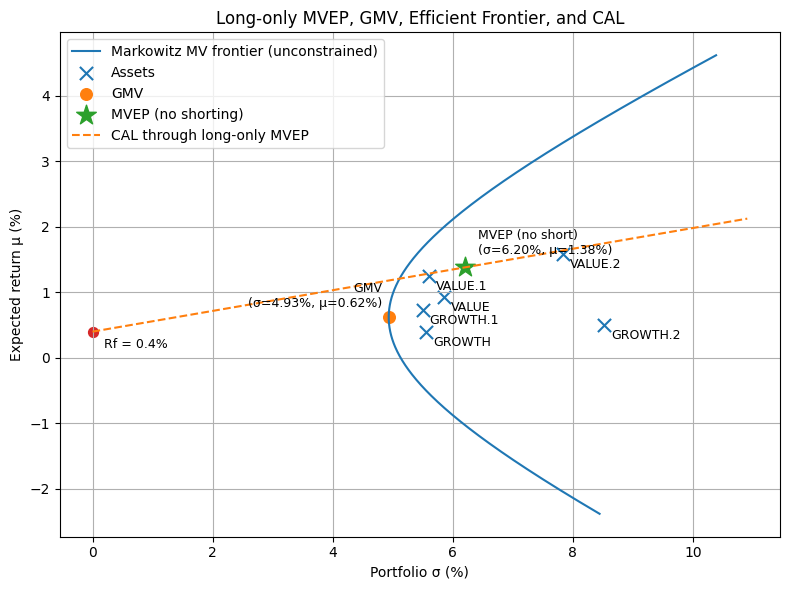

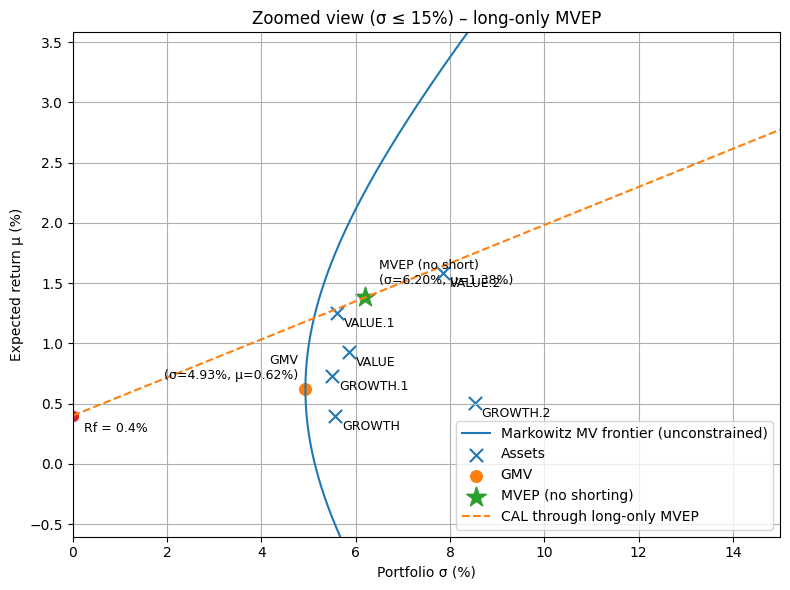

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Inputs (you already have these) ----------
asset_names = ["VALUE","GROWTH","VALUE.1","GROWTH.1","VALUE.2","GROWTH.2"]

E = np.array([
    0.926781, 0.394819, 1.252154, 0.726987, 1.580839, 0.503602  # total expected returns (% per month)
])

SIGMA = np.array([
    [34.32242143, 29.43292547, 29.5176847 , 26.27367872, 39.79705936, 39.93713853],
    [29.43292547, 30.91676397, 27.34445567, 27.08265204, 36.62664135, 40.08769234],
    [29.5176847 , 27.34445567, 31.38189096, 28.66060242, 36.53946732, 37.29183941],
    [26.27367872, 27.08265204, 28.66060242, 30.27115944, 33.57510689, 37.14602496],
    [39.79705936, 36.62664135, 36.53946732, 33.57510689, 61.52138957, 61.86010063],
    [39.93713853, 40.08769234, 37.29183941, 37.14602496, 61.86010063, 72.64499157]
])

Rf = 0.4  # % per month

# Long-only MVEP weights from your SLSQP optimization
# (if the variable name is different, replace MVEP_long_only accordingly)
w_mvep_long = MVEP_long_only.values      # shape (6,)

# ---------- Core MV algebra (frontier & GMV) ----------
E = np.asarray(E, dtype=float).reshape(-1)      # ensure 1D
mu   = E.reshape(-1, 1)
ones = np.ones((len(asset_names), 1))
Sinv = np.linalg.inv(SIGMA)

A = float(ones.T @ Sinv @ ones)
B = float(ones.T @ Sinv @ mu)
C = float(mu.T  @ Sinv @ mu)
D = A*C - B**2

# Global Minimum-Variance portfolio
w_gmv  = (Sinv @ ones) / A                    # weights
mu_gmv = B / A                                # expected return (%)
sd_gmv = 1 / np.sqrt(A)                       # std dev (%)

# Long-only MVEP stats (no short selling)
mu_mvep = float(w_mvep_long @ E)
sd_mvep = float(np.sqrt(w_mvep_long @ SIGMA @ w_mvep_long))
sharpe_long = (mu_mvep - Rf) / sd_mvep
gross_exposure_long = float(np.sum(np.abs(w_mvep_long)))

# Efficient frontier (unconstrained Markowitz frontier)
mu_center = mu_gmv
mu_grid = np.linspace(mu_center - 3.0, mu_center + 4.0, 600)
sd_grid = np.sqrt((A*(mu_grid**2) - 2*B*mu_grid + C) / D)

# Individual asset volatilities
asset_sds = np.sqrt(np.diag(SIGMA))

# ---------- Print stats ----------
print("\nGMV weights (sum=1)")
print(pd.Series(w_gmv.flatten(), index=asset_names).to_string())
print(f"\nGMV  -> mu={mu_gmv:.4f}%, sigma={sd_gmv:.4f}%")

print("\nLong-only MVEP weights (no shorting, sum≈1)")
print(pd.Series(w_mvep_long, index=asset_names).to_string())
print(f"\nLong-only MVEP -> mu={mu_mvep:.4f}%, sigma={sd_mvep:.4f}%, "
      f"Sharpe={sharpe_long:.4f}, gross |w|={gross_exposure_long:.2f}x")

# ---------- Plot 1: Full view ----------
plt.figure(figsize=(8,6))
plt.plot(sd_grid, mu_grid, label="Markowitz MV frontier (unconstrained)")
plt.scatter(asset_sds, E, marker="x", s=90, label="Assets")
for name, x, y in zip(asset_names, asset_sds, E):
    plt.annotate(name, xy=(x, y), xytext=(5, -10),
                 textcoords="offset points", fontsize=9)

# GMV point
plt.scatter([sd_gmv], [mu_gmv], marker="o", s=70, label="GMV")
plt.annotate(f"GMV\n(σ={sd_gmv:.2f}%, μ={mu_gmv:.2f}%)",
             xy=(sd_gmv, mu_gmv),
             xytext=(-5, 5),
             textcoords="offset points",
             ha="right", va="bottom", fontsize=9)

# Long-only MVEP and CAL through it
plt.scatter([sd_mvep], [mu_mvep], marker="*", s=220,
            label="MVEP (no shorting)")
plt.annotate(f"MVEP (no short)\n(σ={sd_mvep:.2f}%, μ={mu_mvep:.2f}%)",
             xy=(sd_mvep, mu_mvep),
             xytext=(10, 10),
             textcoords="offset points", fontsize=9)

sig_line = np.linspace(0, max(sd_grid.max(), sd_mvep)*1.05, 300)
cal_line = Rf + ((mu_mvep - Rf)/sd_mvep) * sig_line
plt.plot(sig_line, cal_line, linestyle="--",
         label="CAL through long-only MVEP")
plt.scatter([0], [Rf], s=50)
plt.annotate(f"Rf = {Rf:.1f}%", xy=(0, Rf),
             xytext=(8, -12),
             textcoords="offset points", fontsize=9)

plt.xlabel("Portfolio σ (%)")
plt.ylabel("Expected return μ (%)")
plt.title("Long-only MVEP, GMV, Efficient Frontier, and CAL")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Plot 2: Zoomed-in view (σ ≤ 15%) ----------
plt.figure(figsize=(8,6))
plt.plot(sd_grid, mu_grid, label="Markowitz MV frontier (unconstrained)")
plt.scatter(asset_sds, E, marker="x", s=90, label="Assets")
for name, x, y in zip(asset_names, asset_sds, E):
    plt.annotate(name, xy=(x, y), xytext=(5, -10),
                 textcoords="offset points", fontsize=9)

plt.scatter([sd_gmv], [mu_gmv], marker="o", s=70, label="GMV")
plt.annotate(f"GMV\n(σ={sd_gmv:.2f}%, μ={mu_gmv:.2f}%)",
             xy=(sd_gmv, mu_gmv),
             xytext=(-5, 5),
             textcoords="offset points",
             ha="right", va="bottom", fontsize=9)

plt.scatter([sd_mvep], [mu_mvep], marker="*", s=220,
            label="MVEP (no shorting)")
plt.annotate(f"MVEP (no short)\n(σ={sd_mvep:.2f}%, μ={mu_mvep:.2f}%)",
             xy=(sd_mvep, mu_mvep),
             xytext=(10, 10),
             textcoords="offset points", fontsize=9)

sig_line = np.linspace(0, 15, 200)
cal_line = Rf + ((mu_mvep - Rf)/sd_mvep) * sig_line
plt.plot(sig_line, cal_line, linestyle="--",
         label="CAL through long-only MVEP")
plt.scatter([0], [Rf], s=50)
plt.annotate(f"Rf = {Rf:.1f}%", xy=(0, Rf),
             xytext=(8, -12),
             textcoords="offset points", fontsize=9)

plt.xlim(0, 15)
plt.ylim(min(min(E), Rf) - 1, max(mu_gmv, *E) + 2)
plt.xlabel("Portfolio σ (%)")
plt.ylabel("Expected return μ (%)")
plt.title("Zoomed view (σ ≤ 15%) – long-only MVEP")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


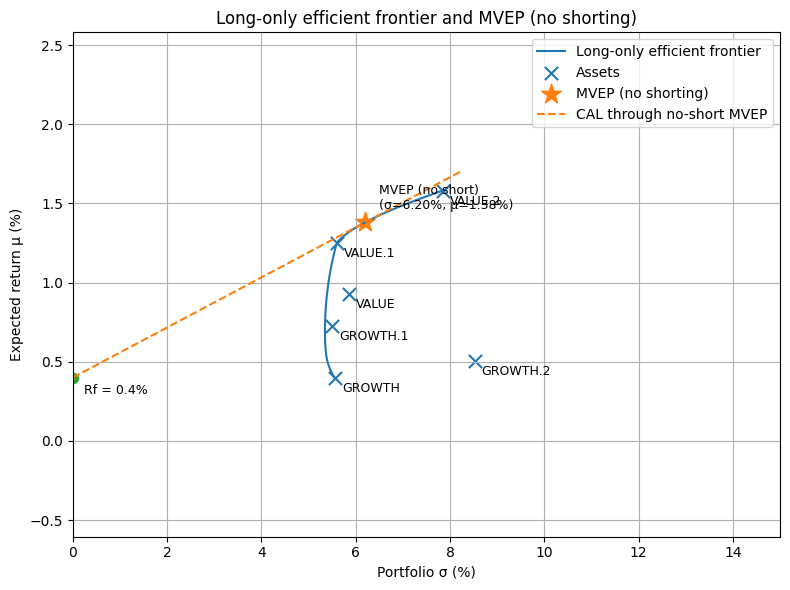

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ---------- Inputs ----------
asset_names = ["VALUE","GROWTH","VALUE.1","GROWTH.1","VALUE.2","GROWTH.2"]

E = np.array([
    0.926781, 0.394819, 1.252154, 0.726987, 1.580839, 0.503602
])
SIGMA = np.array([
    [34.32242143, 29.43292547, 29.5176847 , 26.27367872, 39.79705936, 39.93713853],
    [29.43292547, 30.91676397, 27.34445567, 27.08265204, 36.62664135, 40.08769234],
    [29.5176847 , 27.34445567, 31.38189096, 28.66060242, 36.53946732, 37.29183941],
    [26.27367872, 27.08265204, 28.66060242, 30.27115944, 33.57510689, 37.14602496],
    [39.79705936, 36.62664135, 36.53946732, 33.57510689, 61.52138957, 61.86010063],
    [39.93713853, 40.08769234, 37.29183941, 37.14602496, 61.86010063, 72.64499157]
])
Rf = 0.4

n = len(asset_names)
E_vec = E.reshape(-1)
cov = SIGMA

# Long-only MVEP weights from previous optimization
w_mvep_long = MVEP_long_only.values   # no-short tangency portfolio

# Stats for long-only MVEP
mu_mvep = float(w_mvep_long @ E_vec)
sd_mvep = float(np.sqrt(w_mvep_long @ cov @ w_mvep_long))
sharpe_mvep = (mu_mvep - Rf) / sd_mvep

# ---------- Long-only efficient frontier ----------
def min_var_given_mu(mu_target, w_start):
    """Minimize variance s.t. sum w = 1, w'E = mu_target, w>=0"""
    cons = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0},
        {'type': 'eq', 'fun': lambda w, mu_t=mu_target: w @ E_vec - mu_t}
    ]
    bounds = [(0.0, 1.0)] * n

    res = minimize(
        lambda w: w @ cov @ w,
        w_start,
        method='SLSQP',
        bounds=bounds,
        constraints=cons
    )
    return res

# Grid of target returns within feasible range
mu_min = E_vec.min()
mu_max = E_vec.max()
mu_targets = np.linspace(mu_min, mu_max, 60)

frontier_mu = []
frontier_sd = []

w_prev = np.ones(n) / n  # start from equal weight
for mu_t in mu_targets:
    res = min_var_given_mu(mu_t, w_prev)
    if res.success:
        w_opt = res.x
        w_prev = w_opt
        frontier_mu.append(mu_t)
        frontier_sd.append(np.sqrt(w_opt @ cov @ w_opt))
    # if it fails for some extreme mu_t we just skip it

frontier_mu = np.array(frontier_mu)
frontier_sd = np.array(frontier_sd)

# Individual asset vols
asset_sds = np.sqrt(np.diag(cov))

# ---------- Plot: long-only frontier + MVEP ----------
plt.figure(figsize=(8,6))
plt.plot(frontier_sd, frontier_mu, label="Long-only efficient frontier")
plt.scatter(asset_sds, E_vec, marker="x", s=90, label="Assets")
for name, x, y in zip(asset_names, asset_sds, E_vec):
    plt.annotate(name, xy=(x, y), xytext=(5, -10),
                 textcoords="offset points", fontsize=9)

# Long-only MVEP
plt.scatter([sd_mvep], [mu_mvep], marker="*", s=220,
            label="MVEP (no shorting)")
plt.annotate(f"MVEP (no short)\n(σ={sd_mvep:.2f}%, μ={mu_mvep:.2f}%)",
             xy=(sd_mvep, mu_mvep),
             xytext=(10, 10), textcoords="offset points", fontsize=9)

# CAL through long-only MVEP
sig_line = np.linspace(0, frontier_sd.max()*1.05, 300)
cal_line = Rf + sharpe_mvep * sig_line
plt.plot(sig_line, cal_line, "--", label="CAL through no-short MVEP")
plt.scatter([0], [Rf], s=50)
plt.annotate(f"Rf = {Rf:.1f}%", xy=(0, Rf),
             xytext=(8, -12), textcoords="offset points", fontsize=9)

plt.xlim(0, 15)
plt.ylim(min(min(E_vec), Rf) - 1, max(frontier_mu) + 1)
plt.xlabel("Portfolio σ (%)")
plt.ylabel("Expected return μ (%)")
plt.title("Long-only efficient frontier and MVEP (no shorting)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
